# Basic experiment for deeplearning
> a tutorial about basic operations in deeplearning

- toc: true 
- badges: true
- comments: true
- sticky_rank: 3
- author: Bowen
- categories: [pytorch, fastai2]

In [4]:
from fastcore.basics import *
from fastai.vision.all import *
from fastai.torch_basics import *
import warnings
warnings.filterwarnings("ignore")
set_seed(66)

/home/ubuntu/miniconda3/envs/new/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
aa = L(1,2,3)
aa
aa[2]

(#3) [1,2,3]

3

In [6]:
# map function (lazy generator)
aa = range(10)
bb = map(lambda o:o**2,aa)


In [7]:
L(bb)

(#10) [0,1,4,9,16,25,36,49,64,81]

## common used type convert

In [8]:
# from list to tensor
aa2 = tensor(aa)
aa2
# convert to different device
to_device(aa2,'cpu')
to_device(aa2,'cuda:1')
aa2.cuda()
to_cpu(aa2)
# from tensor to list
aa3 = to_np(aa2)
aa3


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:1')

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], device='cuda:0')

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [9]:
TEST_IMAGE

'images/puppy.jpg'

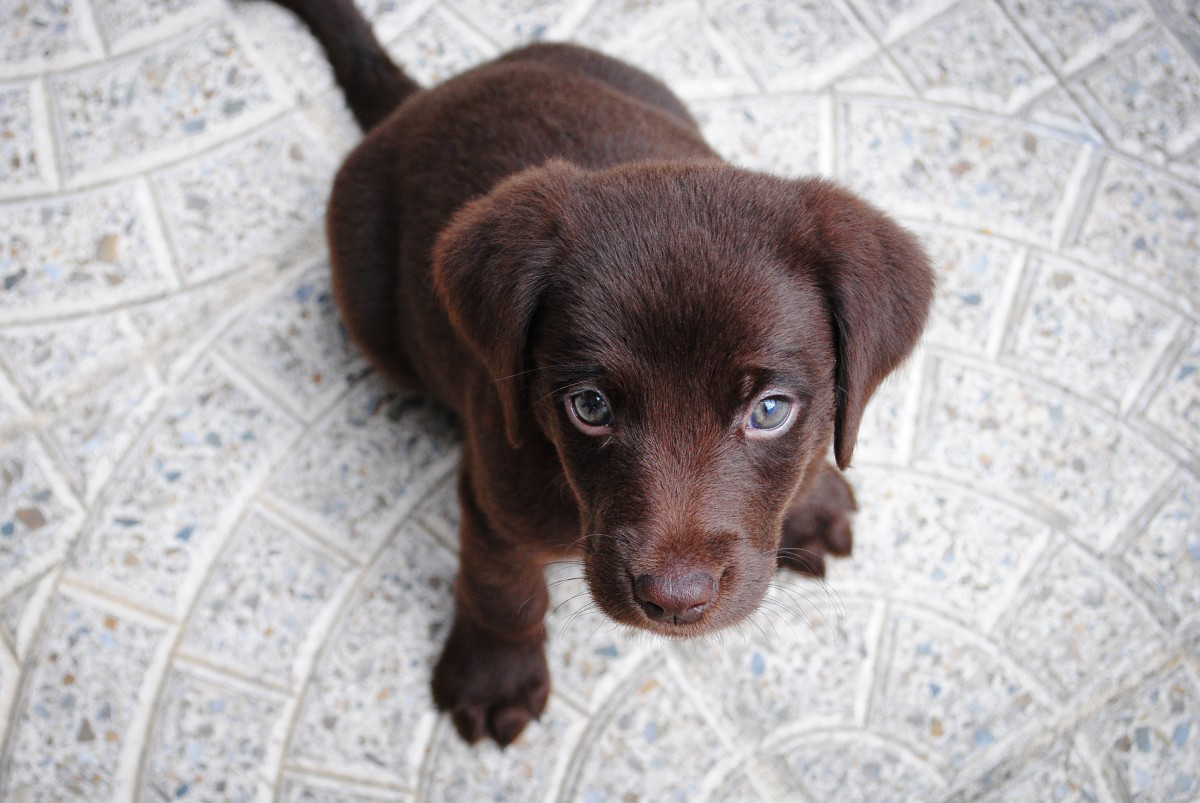

fastai.vision.core.PILImage

tensor([[[192, 195, 199,  ..., 140, 146, 152],
         [193, 195, 198,  ..., 142, 148, 153],
         [194, 194, 196,  ..., 146, 151, 155],
         ...,
         [160, 159, 161,  ..., 201, 206, 209],
         [158, 158, 161,  ..., 208, 213, 215],
         [156, 157, 160,  ..., 214, 218, 219]],

        [[191, 194, 198,  ..., 142, 148, 154],
         [192, 194, 197,  ..., 144, 150, 155],
         [193, 193, 195,  ..., 148, 153, 157],
         ...,
         [160, 159, 161,  ..., 201, 206, 209],
         [158, 158, 161,  ..., 208, 213, 215],
         [156, 157, 160,  ..., 214, 218, 219]],

        [[199, 200, 204,  ..., 154, 160, 166],
         [200, 202, 203,  ..., 156, 162, 167],
         [201, 201, 203,  ..., 160, 165, 169],
         ...,
         [162, 161, 163,  ..., 209, 216, 219],
         [160, 160, 163,  ..., 216, 223, 225],
         [158, 159, 162,  ..., 222, 228, 229]]], dtype=torch.uint8)

torch.Tensor

PIL.Image.Image

In [10]:
im = PILImage.create('/home/ubuntu/sharedData/swp/dlLabSwp/favourite/fastai/nbs/images/puppy.jpg')
im
type(im)
tensorIm = image2tensor(im)
tensorIm
type(tensorIm)
im2 = to_image(tensorIm)
type(im2)

In [11]:
im.shape

(803, 1200)

In [12]:
tensorIm.shape

torch.Size([3, 803, 1200])

## draw a plot

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

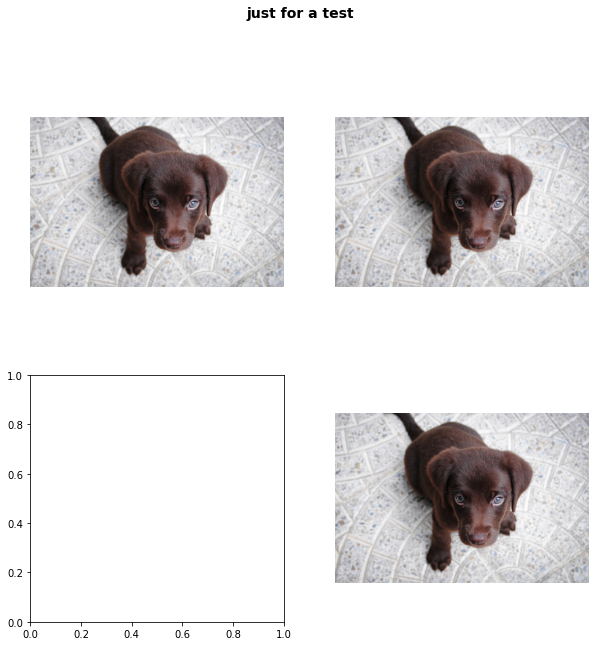

In [13]:
axs = get_grid(4,2,2,figsize=(10,10),title='just for a test')
# [i.set_axis_off() for i in axs]
im.show(ctx=axs[1])
im.show(ctx=axs[0])
im.show(ctx=axs[3])

## data augmentation in fastai

### 对角变换

In [14]:
DihedralItem

fastai.vision.augment.DihedralItem

In [15]:
set_seed(105)
train_a_path = Path("/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top")
label_a_path = Path("/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/gts_for_participants/")
dsm_path = Path("/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/")
imgNames = get_image_files(train_a_path)
lblNames = get_image_files(label_a_path)
dsmNames = get_image_files(dsm_path)
imgN = imgNames[random.randint(1,10)]
lblN = [random.randint(1,10)]
imgN = PILImage.create(imgN)
type(imgN)
# imgN

fastai.vision.core.PILImage

In [16]:
imgNames

(#33) [Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area17.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area23.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area5.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area4.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area28.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_

1
1
1
1
1
1
1
1


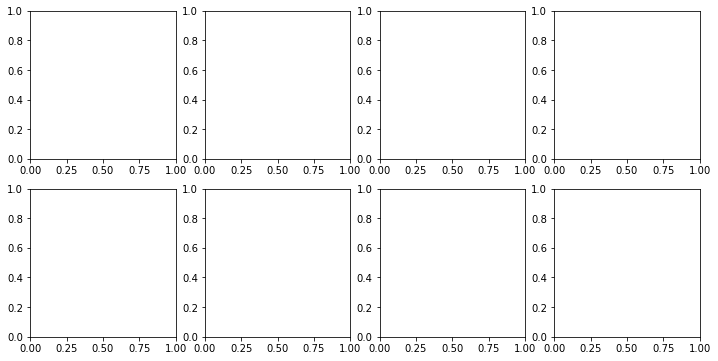

In [17]:
_,axs = subplots(2, 4)
for ax in axs.flatten():
    # p control the probability of the transform
    print(1)
#     show_image(DihedralItem(p=1.)(imgN, split_idx=0), ctx=ax)

## Patch操作

分别从original与DSM，GT中分别取出来一个512\*512的patch

In [18]:
dsmNames

(#33) [Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/dsm_09cm_matching_area22.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/dsm_09cm_matching_area26.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/dsm_09cm_matching_area31.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/dsm_09cm_matching_area37.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/dsm_09cm_matching_area16.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/dsm_

In [19]:
imgNames

(#33) [Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area17.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area23.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area5.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area4.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area28.tif'),Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_

In [20]:
# data
# imgNames[0]= Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/top/top_mosaic_09cm_area17.tif')
# lblNames[0]= Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/gts_for_participants/top_mosaic_09cm_area17.tif')
# dsmNames[0]=Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Vaihingen/ISPRS_semantic_labeling_Vaihingen/dsm/dsm_09cm_matching_area17.tif')

In [80]:
# data
imgNames[0]= Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Potsdam/2_Ortho_RGB/top_potsdam_2_11_RGB.tif')
lblNames[0]= Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Potsdam/5_labels_for_participants/top_potsdam_2_11_label.tif')
dsmNames[0]=Path('/home/ubuntu/sharedData/swp/dlLab/fastaiRepository/fastai/data/rsData/kaggleOriginal/Potsdam/1_dsm/1_DSM/dsm_potsdam_02_11.tif')

In [21]:
from matplotlib import colors
def colormap():
    #  #FFFFFF #0000FF #00FFFF #00FF00 #FFFF00 #FF0000
    cdict = ['#FFFFFF', '#0000FF', '#00FFFF', '#00FF00', '#FFFF00']
    # 按照上面定义的colordict，将数据分成对应的部分，indexed：代表顺序
    return colors.ListedColormap(cdict, 'indexed')

my_cmap = colormap()

In [22]:

# 和上面求得的结果值一样，将其写成固定值
r2gValues = {0: 255, 1: 29, 2: 179, 3: 150, 4: 226, 5: 76}
# print(f'original palette grey value:{pixel2Class}')
# print(f'mapped value:{r2gValues}')

codes = ['ImpSurf', 'Building', 'LowVeg', 'Tree', 'Car', 'Clutter']
codeNums = [0, 1, 2, 3, 4, 5]
# %%


def getMappedMask(dataPath, pixel2Class=r2gValues):
    " 将RGB的值转为对应的连续灰度值,同时替换雾气image中的特殊标志名,r2gValues中,(0,1,2,3,4,5)就是将PILMask.create找到的RGB值对应成相应的连续灰度值,不再是原先那么大的数字"
    #
    # 替换雾气image中的特殊标志名
    # map the original label value to the r2gValues, turn each pixel value to the corresponding grey value and limit to {0 - 5}
#     # r2gValues中,(0,1,2,3,4,5)就是将PILMask.create找到的RGB值对应成相应的连续灰度值,不再是原先那么大的数字
#     _temp = re.sub(r"(thin|moderate|thick)", "mosaic", fname.name)
#     # 插入label的字样 \1 代表的是在符合正则表达式匹配的位置处插入，是定位符
#     _temp = re.sub(r"(area[0-9]{1,2})", "\\1_label", _temp)
#     lbl_name = dataPath/str(_temp)
    # lbl_name = path_lbl / str(re.sub('RGB', 'label', fname.name))
    # take the original
    _originalLb = PILMask.create(dataPath)
    arrays = np.array(_originalLb)
    for k, v in pixel2Class.items():
        arrays[arrays == v] = k
    return PILMask.create(arrays)

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

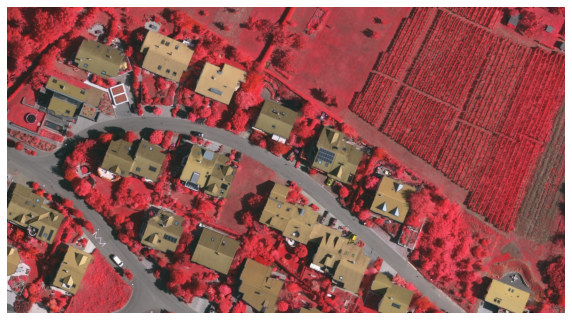

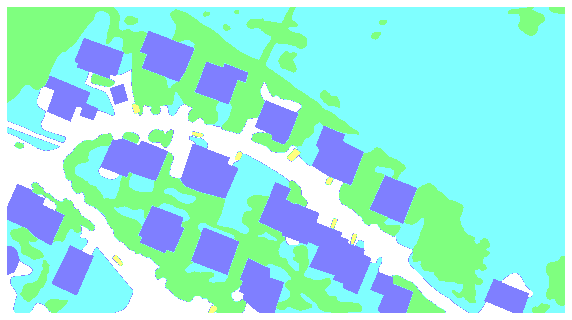

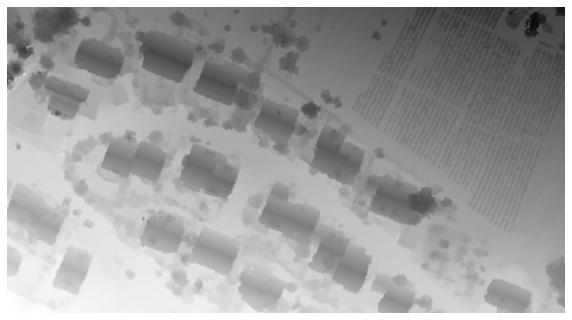

In [23]:
# show the dsm images
rgbImage = PILImage.create(imgNames[0])
# lbImage = PILMask.create(lblNames[0])
lbImage = getMappedMask(lblNames[0])
dsmImage = PILImage.create(dsmNames[0],mode="F")
rgbImage.show(figsize=(10,10))
lbImage.show(figsize=(10,10),cmap=my_cmap)
dsmImage.show(figsize=(10,10), cmap='Greys')

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

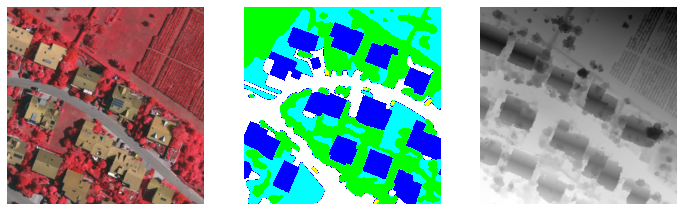

In [24]:
# 同时取一个512*512的小块
_,axs = plt.subplots(1,3,figsize=(12,4))
f = Resize(512)
show_image(f(rgbImage), ctx=axs[0])
show_image(f(lbImage), ctx=axs[1],cmap=my_cmap)
show_image(f(dsmImage), ctx=axs[2],cmap='Greys')


In [26]:
tensor(rgbImage).shape

torch.Size([1281, 2336, 3])

In [27]:
tfms = [Rotate(), Zoom(), Warp(), Brightness(), Flip(), Contrast(),RandomErasing(p=1., max_count=6)]
comp = setup_aug_tfms(tfms)

In [28]:
len(comp)

3

In [29]:
rgbTensor = image2tensor(rgbImage)

下面这一步类型转换非常重要，不然下面的转化无法进行

In [30]:
rgbTensor2 =torch.tensor(rgbTensor,dtype=torch.float32)

In [31]:
type(rgbTensor2)

torch.Tensor

In [32]:
comp[0](rgbTensor2)

tensor([[[187., 183., 179.,  ..., 192., 193., 207.],
         [175., 181., 182.,  ..., 199., 207., 212.],
         [170., 178., 190.,  ..., 197., 203., 201.],
         ...,
         [127., 126., 127.,  ..., 109., 114., 120.],
         [122., 123., 124.,  ..., 103., 113., 121.],
         [117., 117., 117.,  ..., 110., 114., 119.]],

        [[ 72.,  68.,  65.,  ...,  59.,  59.,  66.],
         [ 65.,  67.,  66.,  ...,  61.,  64.,  66.],
         [ 61.,  65.,  71.,  ...,  58.,  60.,  59.],
         ...,
         [123., 123., 123.,  ...,  91.,  94., 101.],
         [118., 119., 120.,  ...,  86.,  95., 103.],
         [113., 114., 114.,  ...,  93.,  96., 101.]],

        [[ 78.,  74.,  71.,  ...,  69.,  69.,  76.],
         [ 73.,  74.,  74.,  ...,  71.,  75.,  76.],
         [ 68.,  72.,  78.,  ...,  67.,  70.,  68.],
         ...,
         [122., 122., 123.,  ...,  83.,  87.,  93.],
         [117., 118., 119.,  ...,  78.,  87.,  94.],
         [112., 112., 112.,  ...,  84.,  88.,  93.]]]

In [33]:
comp

[Rotate -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'reflection', 'mode_mask': 'nearest', 'align_corners': True, 'p': 1.0}:
 encodes: (TensorImage,object) -> encodes
 (TensorMask,object) -> encodes
 (TensorBBox,object) -> encodes
 (TensorPoint,object) -> encodes
 decodes: ,
 Brightness -- {'max_lighting': 0.2, 'p': 1.0, 'draw': None, 'batch': False}:
 encodes: (TensorImage,object) -> encodes
 decodes: ,
 RandomErasing -- {'p': 1.0, 'sl': 0.0, 'sh': 0.3, 'min_aspect': 0.3, 'max_count': 6}:
 encodes: (TensorImage,object) -> encodes
 decodes: ]

## aug_transforms

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

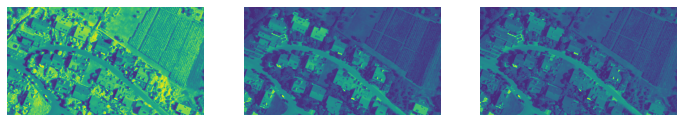

In [35]:
tfms = aug_transforms(pad_mode='zeros', mult=2, min_scale=0.5)
for t in tfms: y = t(rgbTensor2, split_idx=0)
_,axs = plt.subplots(1,3, figsize=(12,3))
for i,ax in enumerate(axs.flatten()): show_image(y[i], ctx=ax)

In [36]:
tfms
len(tfms)

[Flip -- {'size': None, 'mode': 'bilinear', 'pad_mode': 'zeros', 'mode_mask': 'nearest', 'align_corners': True, 'p': 0.5}:
 encodes: (TensorImage,object) -> encodes
 (TensorMask,object) -> encodes
 (TensorBBox,object) -> encodes
 (TensorPoint,object) -> encodes
 decodes: ,
 Brightness -- {'max_lighting': 0.4, 'p': 1.0, 'draw': None, 'batch': False}:
 encodes: (TensorImage,object) -> encodes
 decodes: ,
 RandomResizedCropGPU -- {'size': None, 'min_scale': 0.5, 'ratio': (1, 1), 'mode': 'bilinear', 'valid_scale': 1.0, 'max_scale': 1.0, 'p': 1.0}:
 encodes: (TensorImage,object) -> encodes
 decodes: ]

3

# Kornia for image operation

In [82]:
import kornia
from kornia.constants import Resample
from kornia.color import *
from kornia import augmentation as K
import kornia.augmentation as F
import kornia.augmentation.random_generator as rg
from torchvision.transforms import functional as tvF
from torchvision.transforms import transforms

import matplotlib.pyplot as plt
import numpy as np

to_tensor = transforms.ToTensor()
to_pil = transforms.ToPILImage()
rgbImage = Image.open(imgNames[0])
lblImage = Image.open(lblNames[0])
dsmImage = Image.open(dsmNames[0])
# dsmImage = PILImage.create(dsmNames[0],mode='F')
# rgbImage
aug = K.AugmentationSequential(
    K.RandomRotation(degrees=[80,80], return_transform=True, p=1.),
    K.CenterCrop(256, p=1., cropping_mode="resample"), 
    K.ColorJitter(0.06, 0.06, 0.06, 0, p=1.),
   data_keys=["input"],  # Just to define the future input here.
   return_transform=False,
   same_on_batch=False,
)
aug2 = K.AugmentationSequential(
    K.RandomRotation(degrees=[80,80], return_transform=True, p=1.),
    K.CenterCrop(256, p=1., cropping_mode="resample"), 
   data_keys=["input"],  # Just to define the future input here.
   return_transform=False,
   same_on_batch=False,
)
rgbTensor = to_tensor(rgbImage)
lblTensor = to_tensor(lblImage)
dsmTensor = to_tensor(dsmImage)
# forward the operation
out_rgb_tensors = aug(rgbTensor)
out_lbl_tensors = aug(lblTensor)
out_dsm_tensors = aug2(grayscale_to_rgb(dsmTensor))
rgbTrans = to_pil(out_rgb_tensors.squeeze())
lblTrans = to_pil(out_lbl_tensors.squeeze())
dsmTrans = to_pil(out_dsm_tensors.squeeze())

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

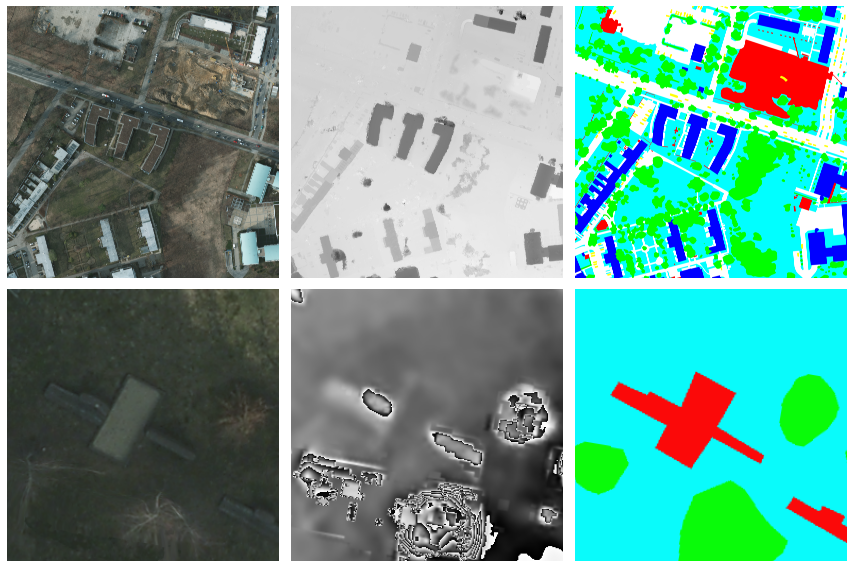

In [83]:
fig,axs = plt.subplots(2,3,figsize=(12,8))
fig.set_tight_layout(True)
show_image(rgbImage,ctx=axs[0][0])
show_image(lblImage,ctx=axs[0][2])
show_image(dsmImage,ctx=axs[0][1], cmap='Greys')
show_image(rgbTrans,ctx=axs[1][0])
show_image(lblTrans,ctx=axs[1][2])
show_image(dsmTrans,ctx=axs[1][1], cmap='Greys')
fig.savefig(f'/home/ubuntu/sharedData/swp/dlLabSwp/testImage/potsdamDataset.png',dpi=500)


# numpy tricks

In [42]:
# 探究 np.where, np.all, np.any
# set_seed(11)
aa = np.random.randint(0,255,(2,2,3))
aa.shape
aa

(2, 2, 3)

array([[[192, 117,  22],
        [ 73, 228,  32]],

       [[192,  36, 176],
        [164, 173,   1]]])

In [43]:
aa[0]

array([[192, 117,  22],
       [ 73, 228,  32]])

In [44]:
i = np.array((253,160,45)).reshape(1,1,3)
i

array([[[253, 160,  45]]])

In [45]:
bb = np.all(aa==i,axis=2)
bb
bb.shape

array([[False, False],
       [False, False]])

(2, 2)

In [46]:
aa[bb]
aa[bb].shape

array([], shape=(0, 3), dtype=int64)

(0, 3)